In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scikitplot as skplt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import Imputer, OneHotEncoder
from pandas.plotting import scatter_matrix
from sklearn import svm
%matplotlib inline

seed = 42

df=pd.read_csv("spine.csv")
len(df)

310

In [2]:
df.describe(include = 'all')

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att,Unnamed: 13
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310,14
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,14
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abnormal,Attribute6 = degree_spondylolisthesis (numeric)
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,210,1
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,0.472979,21.321526,13.064511,11.933317,-14.053139,25.645981,NaN,NaN
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,0.285787,8.639423,3.399713,2.893265,12.225582,10.450558,NaN,NaN
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,0.003220,7.027000,7.037800,7.030600,-35.287375,7.007900,NaN,NaN
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,0.224367,13.054400,10.417800,9.541140,-24.289522,17.189075,NaN,NaN
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,0.475989,21.907150,12.938450,11.953835,-14.622856,24.931950,NaN,NaN
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,0.704846,28.954075,15.889525,14.371810,-3.497094,33.979600,NaN,NaN


In [3]:
df = df.drop(["Unnamed: 13"], axis=1)

In [4]:
# Split data into training and testing sets
y = df["Class_att"]
X = df.drop(["Class_att"], axis=1)
# 20% of dataset goes to test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [5]:
#Standardize the data
X_scaled = preprocessing.scale(X_train)
print(X_scaled.mean())
print(X_scaled.std())

-4.9989880813095085e-17
1.0


In [6]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(max_depth=1)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=1,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [7]:
#Evaluating the classifier using training set
from sklearn.metrics import accuracy_score
gbcy_pred=gbc.predict(X_test)
accuracy_score(gbcy_pred, y_test)

0.7741935483870968

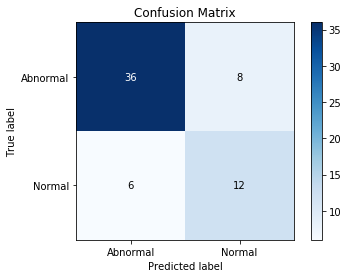

In [8]:
skplt.metrics.plot_confusion_matrix(y_true=y_test, y_pred=gbcy_pred)
plt.show()

In [9]:
import _pickle as cPickle
# save the classifier
with open('spine_classifier.pkl', 'wb') as fid:
    cPickle.dump(gbc, fid) 

In [10]:
# load it again
with open('spine_classifier.pkl', 'rb') as fid:
    gnb_loaded = cPickle.load(fid)